# SEP Distribution Tool

This tool downloads SEP intensity-time series data from various different spacecraft and visualizes the SEP distribution using Gaussian curves in one final results plot.

This tool uses a preset proton energy range to keep the various observations comparable.

There is an option to also show a spacecraft-constellation plot (Solar-MACH) and a table summarizing the spacecraft coordinates for the selected time interval.

In [1]:
# Import modules
import JTL_SEP_functions as jtl

from seppy.util import jupyterhub_data_path
import datetime as dt
import numpy as np
import os
import pandas as pd

from solarmach import SolarMACH

## Saving figures and date

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).

In [2]:
# Set your local path where you want to save the data files. 
# If run on the project's JupyterHub server, set it to a common data folder. 
data_path = f"{os.getcwd()}{os.sep}data/"
data_path = jupyterhub_data_path(data_path)

## Define the event details

Collect the event start and end dates (specifying the start at / near the observed flare onset time), and the eruption location (in Stonyhurst).

In [3]:
startdate = dt.datetime(2021,5,28,22,19)
enddate = startdate + pd.Timedelta(days=1)
dates = [startdate, enddate]

source_location = [67, 19] #longitude, latitude

In [4]:
# Options
event_options = {'04Jan2025': {'date': "2025/01/04 18:27:00",
                               'source': [60, -15]},
                 '17Dec2024': {'date': "2024/12/17 12:53:00",
                               'source': [33, -16]},
                 '08Dec2024': {'date': "2024/12/08 08:50:00",
                               'source': [52, -6]},
                 '03Oct2024': {'date': "2024/10/03 12:08:00",
                               'source': [8, -15]},
                 '01Sep2024': {'date': "2024/09/01 14:44:00",
                               'source': [66, -12]}}

## Show the fleet distribution
For more information on the Solar-MACH tool, see: reflinkhere

NB: If you wish to use BepiColombo data then it will need to downloaded separately and saved to the same folder.

In [5]:
solarmach_table = jtl.solarmach_basic(startdate, data_path, coord_sys='Stonyhurst', source_location=source_location)
display(solarmach_table)        

SolarMACH_28052021_22:19
['SEP_intensities_28052021_RS.csv', 'SolarMACH_28052021_loop-reduced.csv', 'SolarMACH_28052021_22:19.csv', 'soho', 'SEP_intensities_28052021.csv', 'solo', 'psp', 'SEP_intensities_28052021_IC.csv', 'SEP_intensities_28052021-reduced.csv', 'SEP_Intensities_280521.png', 'stereo', 'SolarMACH_28052021_22:19.png', '.ipynb_checkpoints', 'SolarMACH_28052021_loop.csv']
WIN


,Spacecraft/Body.1,Stonyhurst longitude (°),Stonyhurst latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Stonyhurst),Longitudinal separation between body and reference_long,Longitudinal separation between body's magnetic footpoint and reference_long,Latitudinal separation between body and reference_lat
Spacecraft/Body,,,,,,,,,,,
Earth,Earth,-0.000002,-1.036852,1.013495,0.000000,0.000000,371.290009,68.201091,-67.000002,1.201091,-20.036852
PSP,PSP,61.059695,3.108280,0.685340,61.059698,4.145132,394.720640,104.265955,-5.940305,37.265955,-15.891720
Solar Orbiter,Solar Orbiter,-98.578091,-0.943589,0.950952,-98.578089,0.093263,361.985863,-32.958183,-165.578091,-99.958183,-19.943589
STEREO-A,STEREO-A,-50.395401,-6.234611,0.963644,-50.395399,-5.197760,371.396552,13.897956,-117.395401,-53.102044,-25.234611
BepiColombo,BepiColombo,-110.733366,-3.410311,0.798805,-110.733364,-2.373459,400.000000,-61.011138,-177.733366,-128.011138,-22.410311


## Spacecraft options

Here details the relevant spacecraft, their instruments, which channel(s) is(are) used, and the intercalibration values. The only intercalibration value we have found so far is from [Richardson et al. (2014), page 3064](https://doi.org/10.1007/s11207-014-0524-8) which found SOHO/ERNE-HED 13.8-24.2 MeV proton intensities to be about 1.5 times the STEREO-A/HET proton intensities of the same energy.

In [6]:
## 25-40 MeV Proton channels
#proton_channels = {'PSP': {'instrument': 'EpiHi-HET',
#                           'channels': [8,9],
#                           'intercalibration': 1},
#                   'SOHO': {'instrument': 'ERNE-HED',
#                            'channels': [3,4],
#                            'intercalibration': 1},
#                   'STEREO-A': {'instrument': 'HET',
#                                'channels': [5,8],
#                                'intercalibration': 1},
#                   'Solar Orbiter': {'instrument': 'HET',
#                                     'channels': [19,24],
#                                     'intercalibration': 1}}

# ~14 MeV Proton channels
proton_channels = {'PSP': {'instrument': 'EpiHi-HET',
                           'channels': [3,4],
                           'intercalibration': 1},
                   'SOHO': {'instrument': 'ERNE-HED',
                            'channels': [0],
                            'intercalibration': 0.67},
                   'STEREO-A': {'instrument': 'HET',
                                'channels': [0],
                                'intercalibration': 1},
                   'Solar Orbiter': {'instrument': 'HET',
                                     'channels': [10,12],
                                     'intercalibration': 1}}

Which instruments would you like to include?

In [7]:
spacecraft = ['PSP', 'SOHO', 'STEREO-A', 'Solar Orbiter']
sc_to_plot = spacecraft # if a spacecraft is removed from the above, but you still want it plotted.
intercalibration = False
radial_scaling = False
radscaling_values = [1.97, 0.27] # values for a \pm b ; 'p': {'a': 1.97, 'b': 0.27}
resampling = '15min'

In [8]:
df = jtl.load_sc_data(spacecraft=spacecraft, 
                      proton_channels=proton_channels,
                      dates=dates,
                      data_path=data_path,
                      intercalibration=intercalibration, 
                      radial_scaling=radial_scaling,
                      resampling=resampling,
                      reference_loc=source_location)

['Solar Orbiter', 'STEREO-A', 'PSP', 'SOHO']


Save the file?  y
Save file key word:  raw


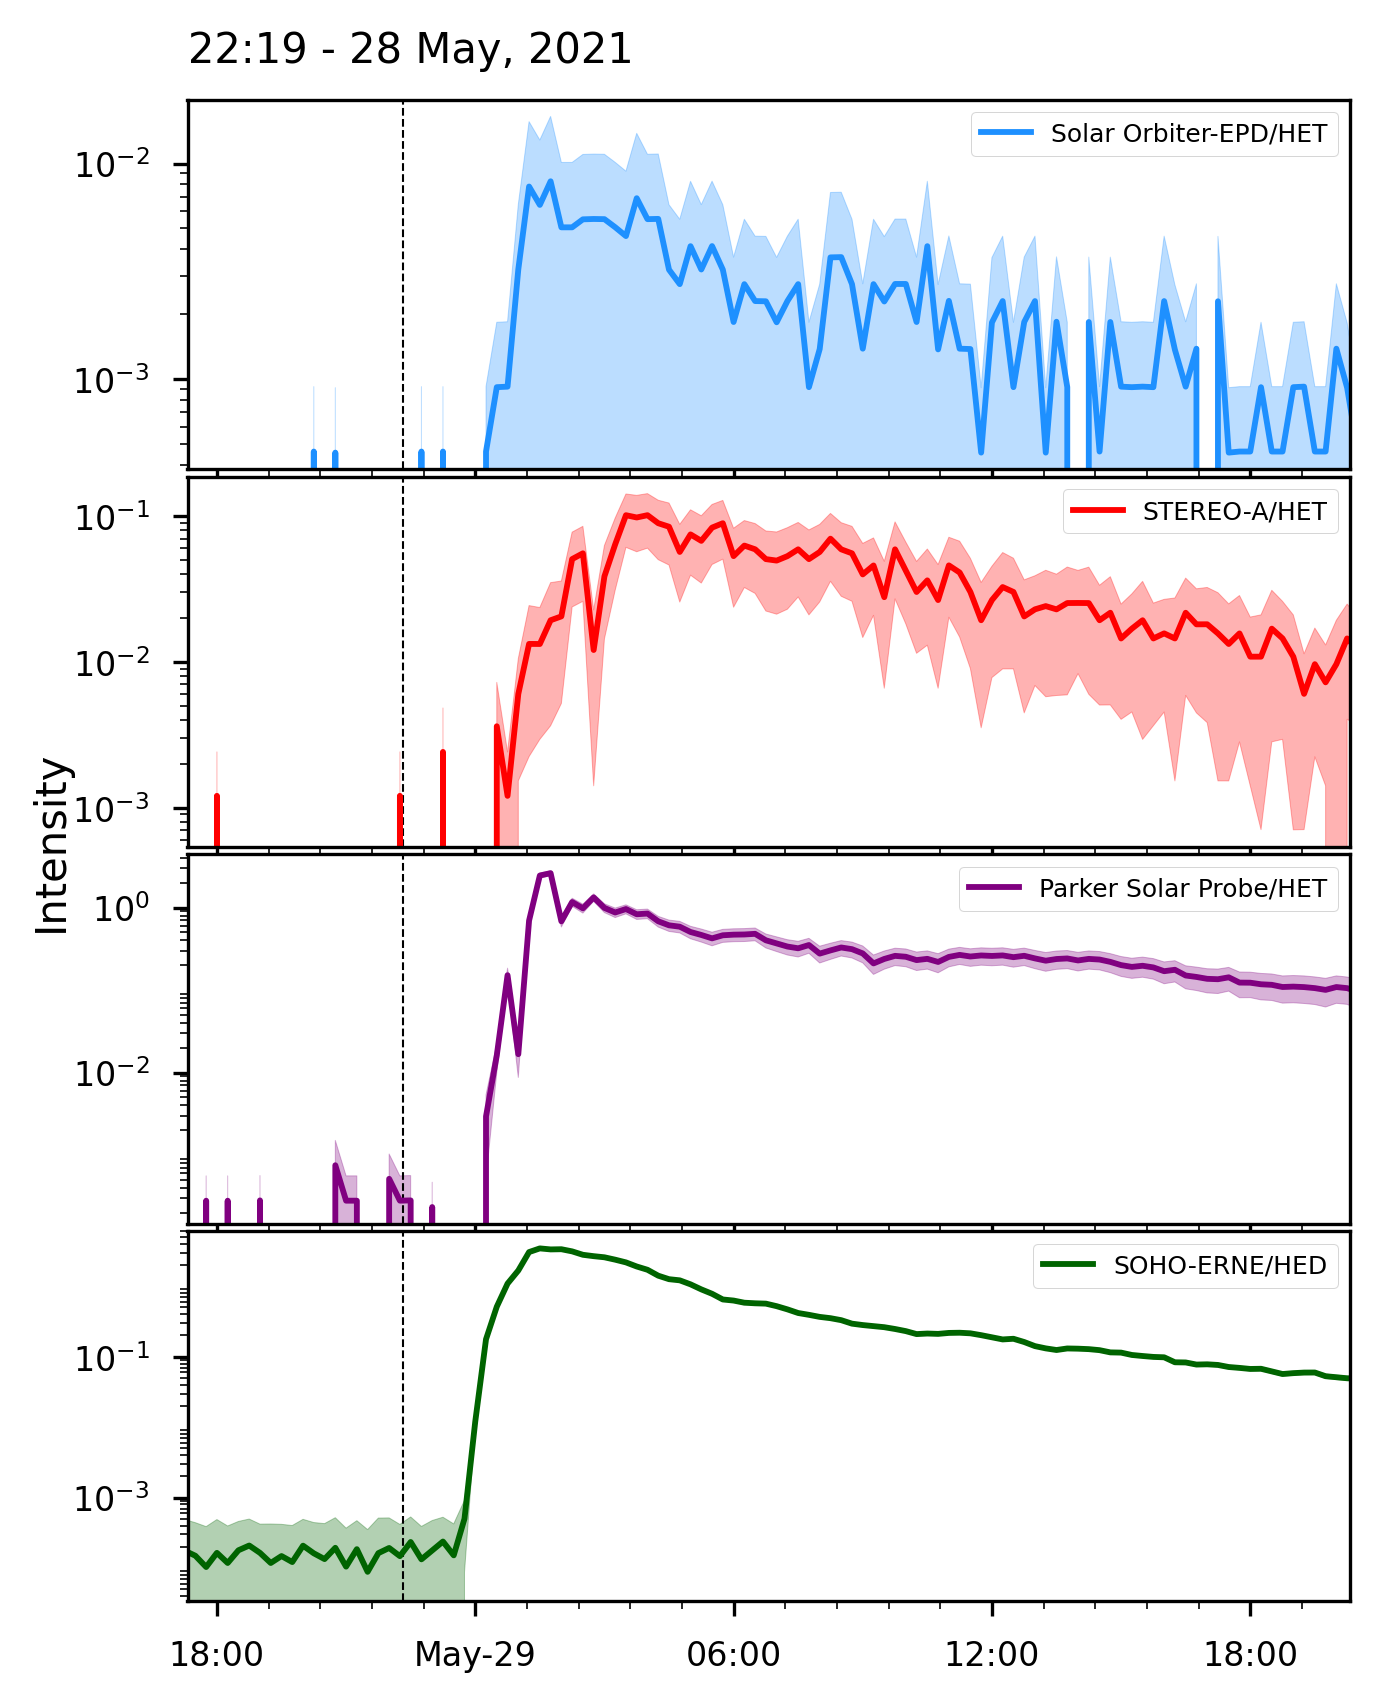

In [10]:
df
jtl.plot_timeseries_result(df, data_path, dates)


# Build to one df (synced the times) with headers:
# Layer 1: sc-ins
# Layer 2: Flux, Uncertainty, radial position, longitude.

## Instrument intercalibration

There aren't many recent studies done on calculating the proton instruments intercalibration but most HET instruments are assumed to be similar. The default values used here work on that assumption and use the [Richardson et al.(2014)](https://link.springer.com/article/10.1007/s11207-014-0524-8) study for the intercalibration factor between SOHO-ERNE/HED and STEREO-A HET (1 : 1.5).

def intercalibration_calculation(df, observer_metadict, data_path, dates):
    # Iterate through the observers (first header in df)
    for obs, meta_data in observer_metadict.items():
        factor = meta_data['intercalibration'] # extract the intercalibration factor
        print(obs)
        print(meta_data)
        print(factor)
        jax=input('yes? ')

        # Apply the scaling to the Flux and Uncertainty columns
        for col in ['Flux','Uncertainty']: # Both are calculated the same
            print(df[(obs,col)])
            jax=input('huh?')
            df[(obs, col)] *= factor

    df.to_csv(f"{data_path}SEP_intensities_{dates[0].strftime("%d%m%Y")}_IC.csv") # Save for sanity checks

    return df

['Solar Orbiter', 'STEREO-A', 'PSP', 'SOHO']


Save the file?  y
Save file key word:  afterIC


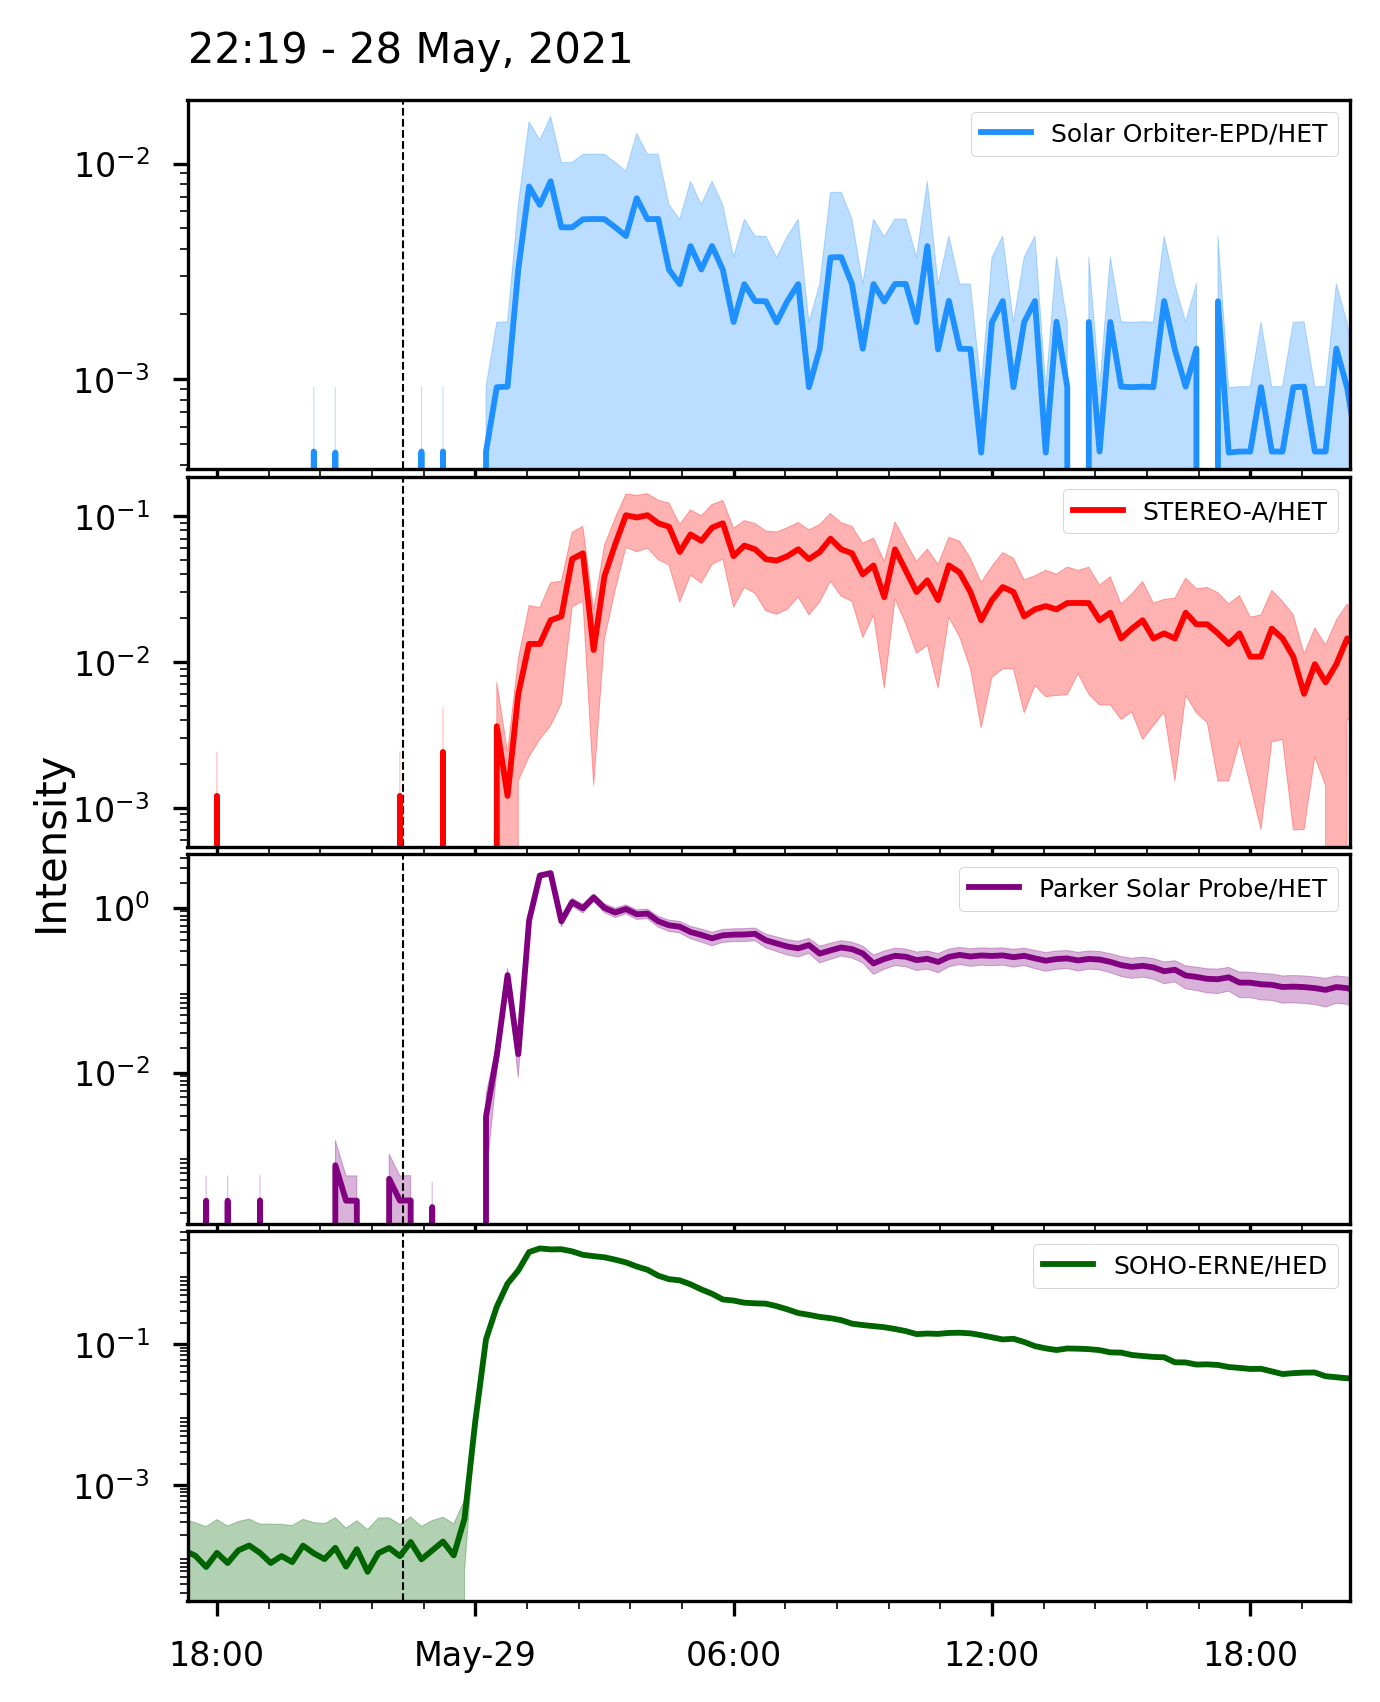

In [11]:
df1 = jtl.intercalibration_calculation(df, proton_channels, data_path, dates)
jtl.plot_timeseries_result(df1, data_path, dates)


In [12]:
df1

PSP                                   \
                         Flux Uncertainty r_dist vsw foot_long   
Time                                                             
2021-05-28 00:00:00  0.000234    0.000234    NaN NaN       NaN   
2021-05-28 00:15:00  0.000279    0.000279    NaN NaN       NaN   
2021-05-28 00:30:00  0.000235    0.000235    NaN NaN       NaN   
2021-05-28 00:45:00  0.000281    0.000281    NaN NaN       NaN   
2021-05-28 01:00:00  0.000235    0.000235    NaN NaN       NaN   
...                       ...         ...    ...  ..       ...   
2021-05-29 22:45:00  0.072014    0.031296    NaN NaN       NaN   
2021-05-29 23:00:00  0.076225    0.032289    NaN NaN       NaN   
2021-05-29 23:15:00  0.068041    0.030550    NaN NaN       NaN   
2021-05-29 23:30:00  0.066601    0.030116    NaN NaN       NaN   
2021-05-29 23:45:00  0.063607    0.029095    NaN NaN       NaN   

                                         SOHO                         ...  \
                    foot_long_error      Flux Uncertainty r_dist vsw  ...   
Time                                                                  ...   
2021-05-28 00:00:00             NaN  0.000100    0.000182    NaN NaN  ...   
2021-05-28 00:15:00             NaN  0.000080    0.000166    NaN NaN  ...   
2021-05-28 00:30:00             NaN  0.000069    0.000173    NaN NaN  ...   
2021-05-28 00:45:00             NaN  0.000050    0.000166    NaN NaN  ...   
2021-05-28 01:00:00             NaN  0.000060    0.000178    NaN NaN  ...   
...                             ...       ...         ...    ...  ..  ...   
2021-05-29 22:45:00             NaN  0.027890    0.002189    NaN NaN  ...   
2021-05-29 23:00:00             NaN  0.026184    0.002121    NaN NaN  ...   
2021-05-29 23:15:00             NaN  0.024593    0.002052    NaN NaN  ...   
2021-05-29 23:30:00             NaN  0.024156    0.002035    NaN NaN  ...   
2021-05-29 23:45:00             NaN  0.023168    0.001996    NaN NaN  ...   

                    STEREO-A                               Solar Orbiter  \
                      r_dist vsw foot_long foot_long_error          Flux   
Time                                                                       
2021-05-28 00:00:00      NaN NaN       NaN             NaN      0.000461   
2021-05-28 00:15:00      NaN NaN       NaN             NaN      0.000922   
2021-05-28 00:30:00      NaN NaN       NaN             NaN      0.000456   
2021-05-28 00:45:00      NaN NaN       NaN             NaN      0.000456   
2021-05-28 01:00:00      NaN NaN       NaN             NaN      0.000456   
...                      ...  ..       ...             ...           ...   
2021-05-29 22:45:00      NaN NaN       NaN             NaN      0.000461   
2021-05-29 23:00:00      NaN NaN       NaN             NaN      0.000000   
2021-05-29 23:15:00      NaN NaN       NaN             NaN      0.000917   
2021-05-29 23:30:00      NaN NaN       NaN             NaN      0.000922   
2021-05-29 23:45:00      NaN NaN       NaN             NaN      0.001378   

                                                                      
                    Uncertainty r_dist vsw foot_long foot_long_error  
Time                                                                  
2021-05-28 00:00:00    0.000461    NaN NaN       NaN             NaN  
2021-05-28 00:15:00    0.000922    NaN NaN       NaN             NaN  
2021-05-28 00:30:00    0.000456    NaN NaN       NaN             NaN  
2021-05-28 00:45:00    0.000456    NaN NaN       NaN             NaN  
2021-05-28 01:00:00    0.000456    NaN NaN       NaN             NaN  
...                         ...    ...  ..       ...             ...  
2021-05-29 22:45:00    0.000461    NaN NaN       NaN             NaN  
2021-05-29 23:00:00    0.000000    NaN NaN       NaN             NaN  
2021-05-29 23:15:00    0.000917    NaN NaN       NaN             NaN  
2021-05-29 23:30:00    0.000922    NaN NaN       NaN             NaN  
2021-05-29 23:45:00    0.001378   

## Radial Scaling

Using the values presented in [Farwa, et al. (2025)](https://www.aanda.org/articles/aa/abs/2025/01/aa50945-24/aa50945-24.html), which used values for 27-37 MeV protons from [Lario et al. (2006)](https://iopscience.iop.org/article/10.1086/508982) (for ~100 keV electrons, [Rodríguez-García et al. (2023)](https://www.aanda.org/10.1051/0004-6361/202244553) is used).

The scaled intensity is calculated as $I_{1 au} = I \cdot R^{a\pm b}$, where $R$ is the radial distance, $I$ is the original intensity, and (for protons specifically) the scaling factors are given as $a \pm b = 1.97 \pm 0.27$.

To calculate the scaled uncertainty, we use the following procedure:
1. Calculate the boundary limits for the intensity calculation (e.g. the result should be $I_{-\alpha}^{+\beta}$).
2. Find the higher boundary limit, as long as it is < the nominal value (e.g. $\beta$).
3. Calculate the scaled uncertainty value: $\Delta I_{1 au} = \Delta I \cdot R^a$.
4. Combine both to get a final uncertainty value: $\Delta I_{1 au, final} = \sqrt{(\beta)^2 + (\Delta I_{1 au})^2}$.

NB: Check that this final uncertainty is still less than the intensity value!

def radial_scaling_calculation(df0, data_path, scaling_values, dates):
    df = df0.copy(deep=True) # so it doesnt mess with the OG df's
    
    a = scaling_values[0]
    b = scaling_values[1]

    # Iterate through observers
    for obs, df_obs in df.groupby(level=0, axis=1): # returning the observer and their specific df

        for t in df_obs.index:
            print(df_obs.loc[t, (obs,'Flux')])
            if pd.isna(df_obs.loc[t, (obs,'Flux')]) or pd.isna(df_obs.loc[t, (obs,'r_dist')])\
            or (df_obs.loc[t, (obs,'Flux')]==0) or (df_obs.loc[t, (obs,'r_dist')]==0):
                f_rscld = np.nan
                unc_final = np.nan
            
            else:
                # Scale the flux
                f_rscld = df_obs.loc[t, (obs,'Flux')] * (df_obs.loc[t, (obs,'r_dist')] ** a)

                # Scale the uncertainty
                ## Find the difference from the boundaries
                unc_plus = df_obs.loc[t, (obs,'Flux')] * (df_obs.loc[t, (obs,'r_dist')] **(a+b))
                unc_limit_plus = abs(f_rscld - unc_plus)
                unc_minus = df_obs.loc[t, (obs,'Flux')] * (df_obs.loc[t, (obs,'r_dist')] **(a-b))
                unc_limit_minus = abs(f_rscld - unc_minus)
    
                if (unc_limit_plus >= unc_limit_minus) and (f_rscld - unc_limit_plus > 0):
                    chosen_unc_limit = unc_limit_plus
                elif (unc_limit_minus >= unc_limit_plus) and (f_rscld - unc_limit_minus > 0):
                    chosen_unc_limit = unc_limit_minus
                else:
                    print("There's a problem with the limits")
                    print("OG flux: ", df_obs.loc[t, (obs,'Flux')])
                    print("OG rad: ", df_obs.loc[t, (obs,'r_dist')])
                    print("Scaled Flux: ", f_rscld)
                    print("Unc plus: ", unc_limit_plus)
                    print("Unc minus: ", unc_limit_minus)
                    jax = input('Continue? ')
                    chosen_unc_limit = np.nan
    
                ## Find the calculated scaled uncertainty
                unc_calculated = df_obs.loc[t, (obs,'Uncertainty')] * (df_obs.loc[t, (obs,'r_dist')] ** a)
    
                ## Merge both results for the final scaled uncertainty
                unc_final = np.sqrt((unc_calculated)**2 + (chosen_unc_limit)**2)

            df.loc[t, (obs, 'Flux')] = f_rscld
            df.loc[t, (obs, 'Uncertainty')] = unc_final


    df.to_csv(f"{data_path}SEP_intensities_{dates[0].strftime("%d%m%Y")}_RS.csv") # Save for sanity checks
    return df

/home/jaxl/Desktop/SOLER_SEPdistributiontool/JTL_SEP_functions.py:472: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for obs, df_obs in df.groupby(level=0, axis=1): # returning the observer and their specific df


0.0002337290594975
0.0002792045784493
0.0002350423174599
0.0002814570752282
0.0002350409359981
0.0
0.0002337183337658
0.0
0.0
0.0
0.0
0.0
0.0005583818691472
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
0.0002350891319413
0.0002337436346958
0.0
0.0
0.000279213146617
0.0
0.00027920845896
0.0
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0005885482144852
0.0
0.0
0.0
0.0
0.0002791964138547
0.0
0.0002791951410472
0.0
0.0
0.0002814637497067
0.0
0.0
0.0
0.0
0.0
0.0
0.0007515503869702
0.000279185300072
0.0002791884355247
0.0
0.0
0.0005142294801771
0.000279186759144
0.0002814625079433
0.0
0.000233705388382
0.0
0.0
0.0
0.0
0.0029386695629606
0.0161388882125417
0.1517734279235204
0.0167027070963134
0.6973594967586298
2.4546905480325223
2.622312477727731
0.6831174905101458
1.1700444519519806
0.981725839773814
1.331256452202797
0.9932928542296092
0.8739045202732086
0.96246550877889
0.8320101956526439
0.848555

Save the file?  y
Save file key word:  afterRS


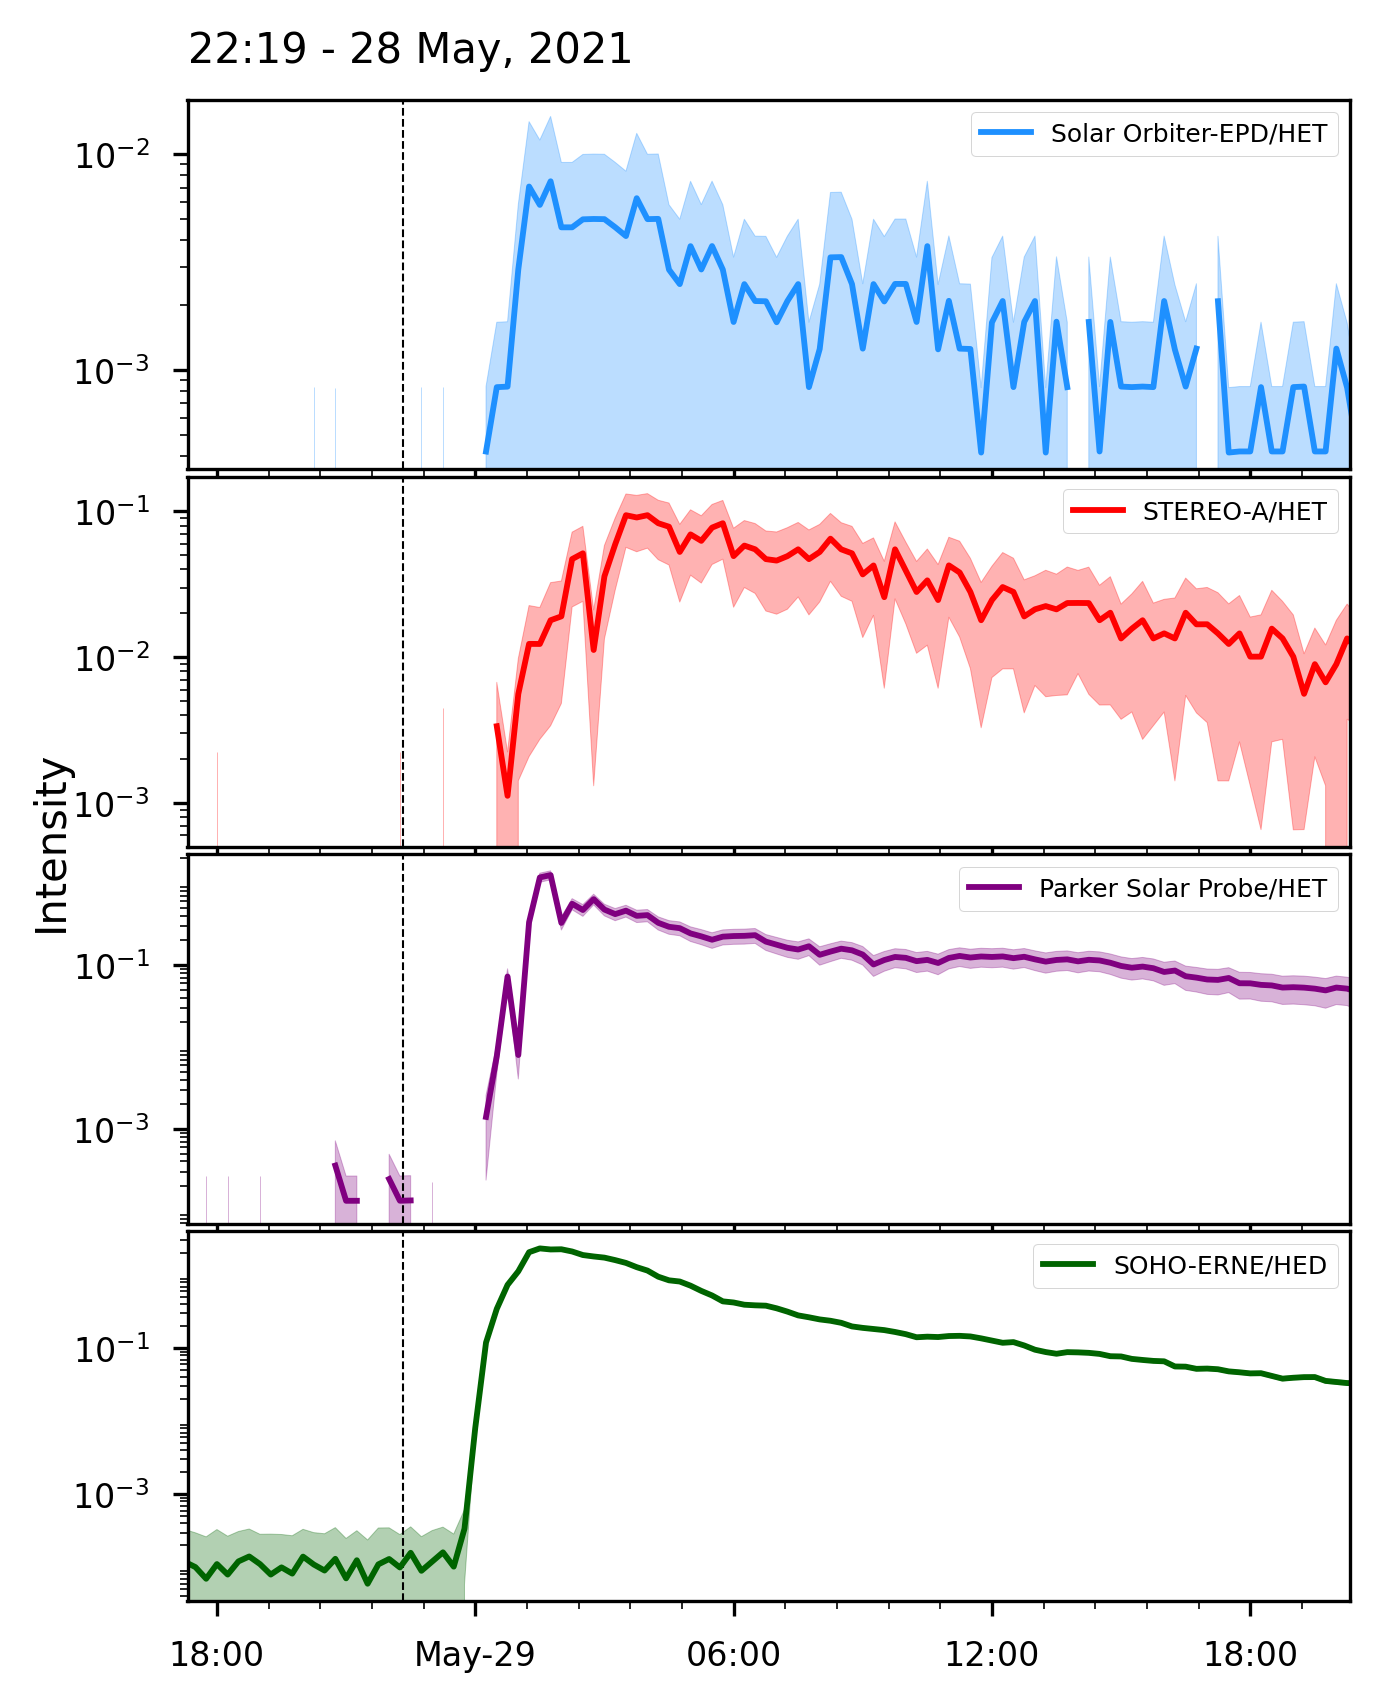

In [13]:
df2 = jtl.radial_scaling_calculation(df1, data_path, radscaling_values, dates)
jtl.plot_timeseries_result(df2, data_path, dates)


## Background subtraction

plot time series of all instruments and let the user decide on a background window for each. Then background subtract it all.

['Solar Orbiter', 'STEREO-A', 'PSP', 'SOHO']


Save the file?  y
Save file key word:  BG


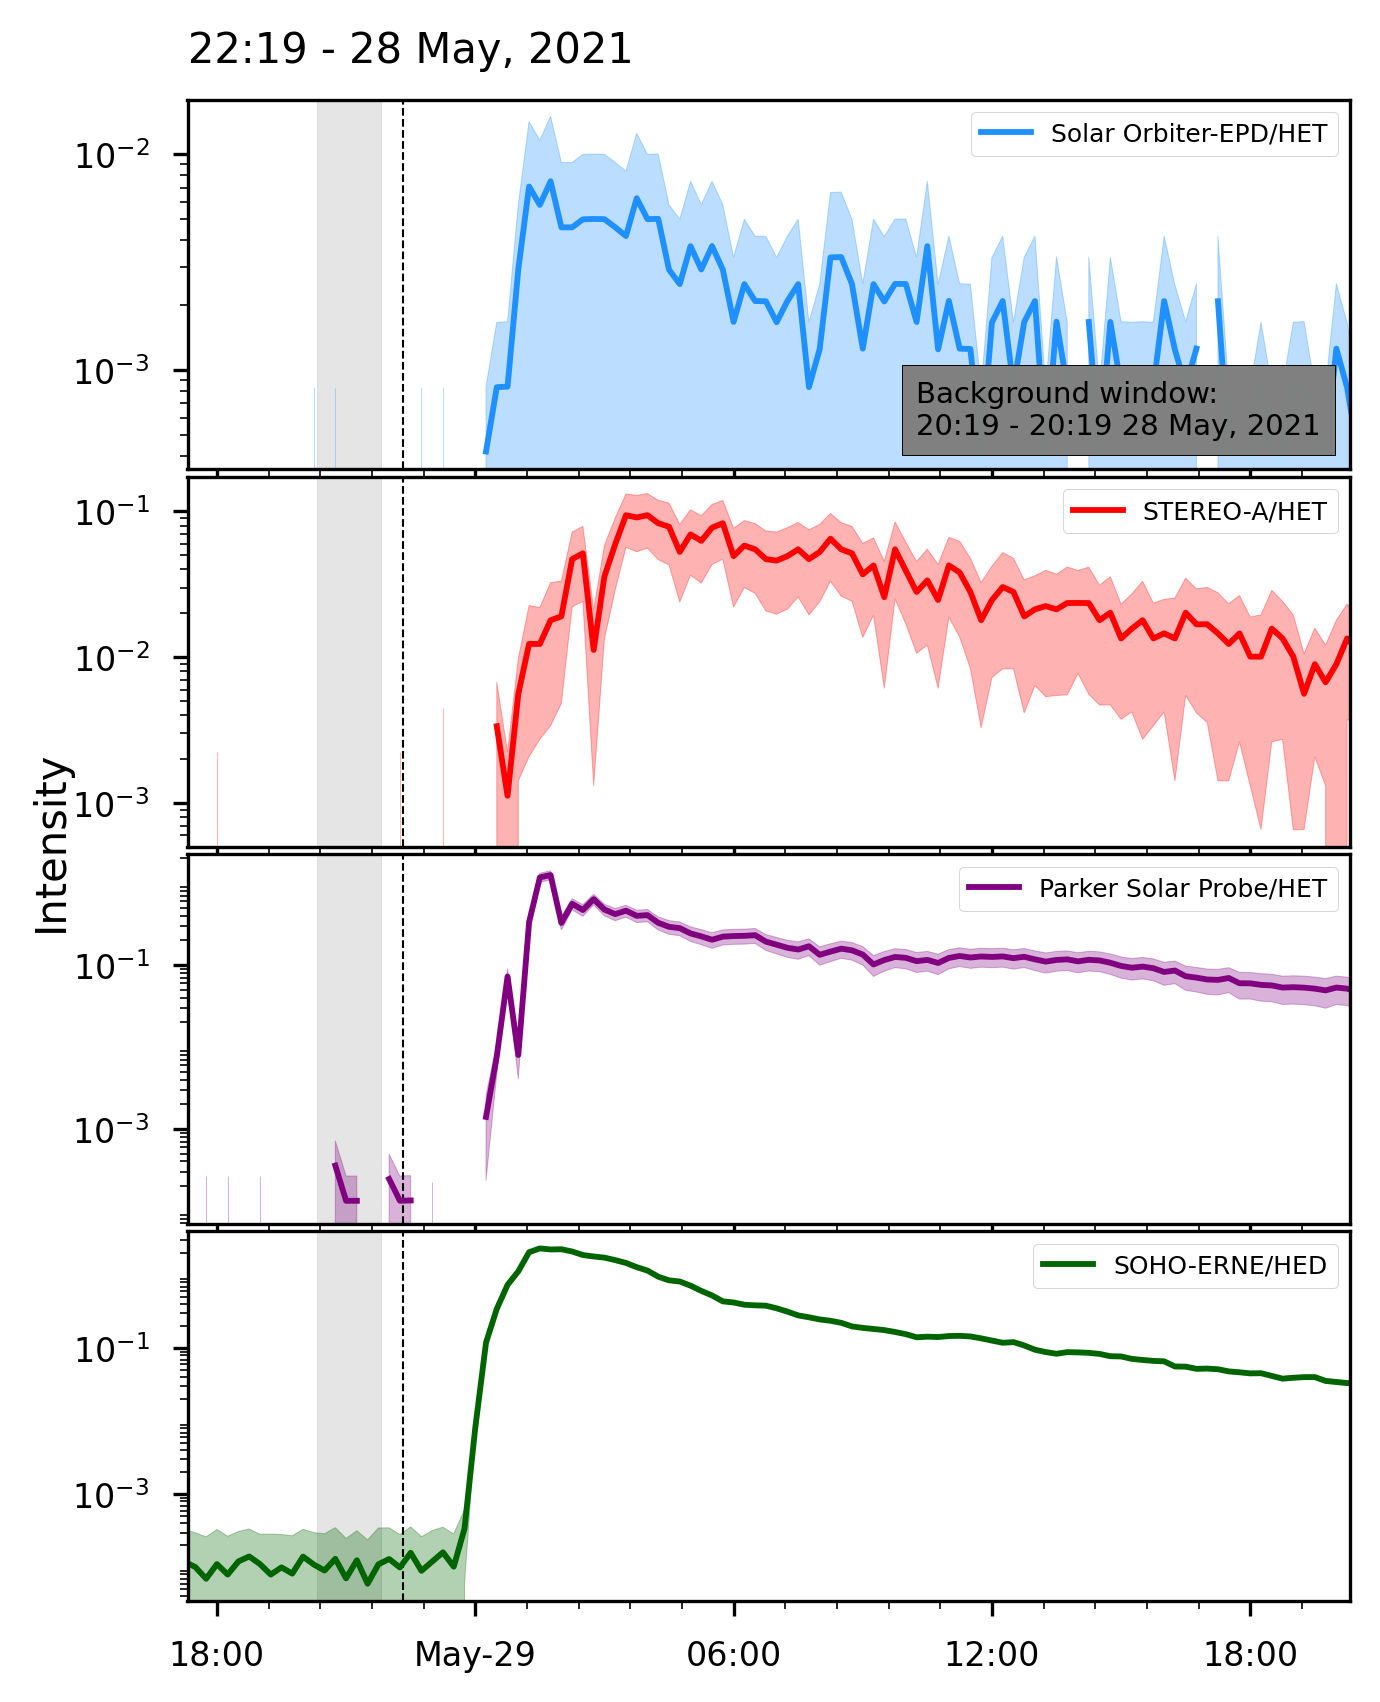

In [15]:
# Plot


background_window = [startdate-dt.timedelta(hours=2), startdate-dt.timedelta(minutes=30)]
jtl.plot_timeseries_result(df2, data_path, dates, background_window=background_window)
# User input on background

# Background subtraction

# Gaussian curve fitting
First with scipy.curve_fit then with scipy's ODR function (with the uncertainties). Produce and save a fig into a new subfolder each time. Fig should include curve on the left and intensity with vertical line for time tracking on the right.

# Plot final time series
3 subplots:
1. Intensity
2. Center
3. Sigma

# (Optional) Gif of gaussian figs

# (For later) Latitude fits 
Fit ecliptic plane instruments first (instruments at < 10 degrees latitude) then plot all instruments with ecliptic gaussian to deduce offset. Still to find events for this.